импорт и чтение данных о продажах:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
#magic комманды

%matplotlib inline 

In [ ]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


Данные состоят из транзакций продаж за `2014` год. 

In [ ]:
top_10 = (df.groupby('name')[['ext price', 'quantity']].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()

In [ ]:
top_10.head()

,name,ext price,quantity
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81


In [ ]:
top_10.rename(columns={'name':'Name', 
                       'ext price':'Sales', 
                       'quantity':'Purchases'}, 
              inplace=True)

данные:

In [ ]:
top_10.head()

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81


 у *matplotlib* есть много разных стилей, доступных для отображения графиков (*plots*). Вы можете увидеть, какие из них доступны в вашей системе, используя `plt.style.available`:

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Выбор стиля:

In [ ]:
plt.style.use('ggplot')

простой график данных с помощью стандартной функции построения (*plotting*) в *pandas*:

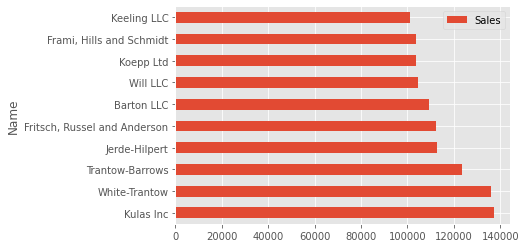

In [ ]:
top_10.plot(kind='barh', y="Sales", x="Name")

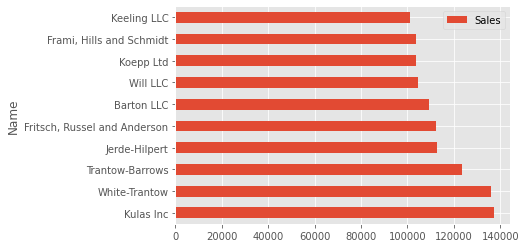

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

 мы добавили дополнительный вызов `plt.subplots()` и передали `ax` функции построения графика. 

Любая дальнейшая настройка будет выполняться с помощью объектов `ax` или `fig`.

Настроим пределы `x` и изменим метки некоторых осей:

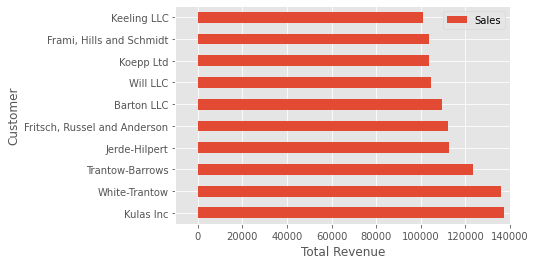

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');


Вот еще один прием, который мы можем использовать для изменения заголовка и обеих меток:

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

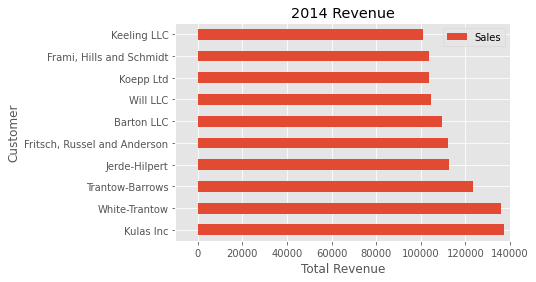

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

Настроим размер изображения. 

Используя функцию `plt.subplots()`, можем определить `figsize` (размер файла) в дюймах, а также удалить легенду с помощью `ax.legend().set_visible(False)`:

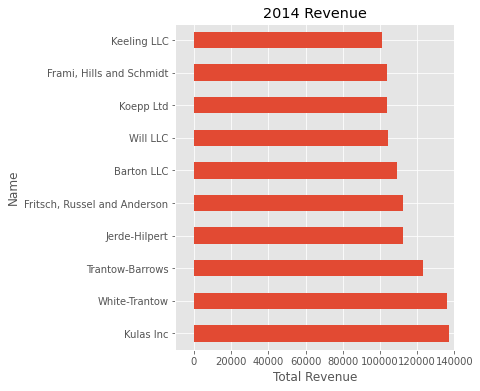

In [ ]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

 `FuncFormatter`. Эта универсальная функция позволяет применять пользовательскую функцию к значению и возвращать красиво отформатированную строку для размещения на оси.


In [ ]:
def currency(x, pos):
    'Два аргумента - это значение и позиция отметки.'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

Теперь, когда у нас есть функция форматирования, нужно определить ее и применить к оси `x`. 



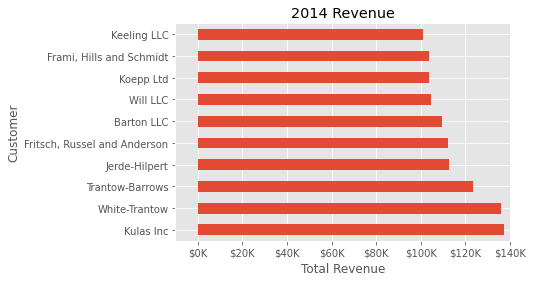

In [ ]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

возможность добавлять *аннотации* к графику. Чтобы нарисовать вертикальную линию, можно использовать `ax.axvline()`, а для добавления собственного текста - `ax.text()`.

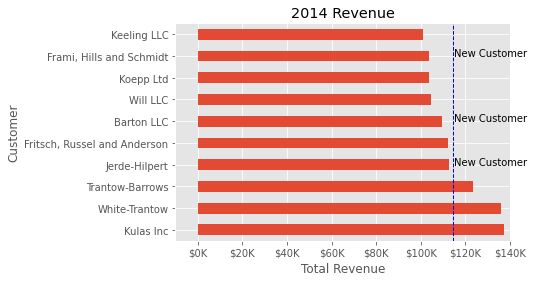

In [ ]:
# Создаем новую фигуру и оси
fig, ax = plt.subplots()

# График данных и усредненное значение
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Устанавливаем ограничения и метки
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Добавляем линию для среднего
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Указываем новых покупателей
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Формат валюты
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Скрываем легенду
ax.legend().set_visible(False)



## Фигуры и графики (Figures and Plots)

В Matplotlib у нас есть возможность добавить несколько графиков к фигуре, а также сохранить фигуру целиком, используя различные параметры.

Как отобразить 2 графика на одной фигуре

Сначала создайте фигуру, потом оси, а затем нанесите все вместе. 

Можем сделать это с помощью `plt.subplots()`:

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2, sharey=True, figsize=(7, 4))

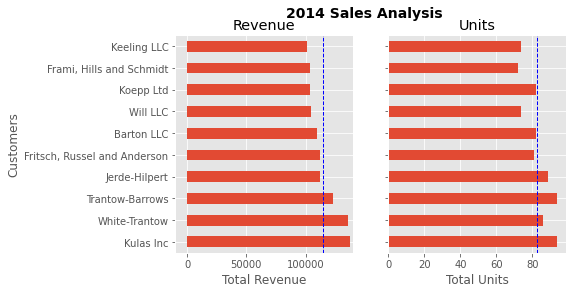

In [ ]:
# Получаем фигуру и оси
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)

ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Рисуем среднее, как вертикальную линию
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Повторите для отдельного графика
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()

ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Заголовок фигуры
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Скрываем легенды
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)


*Matplotlib* поддерживает множество различных форматов для сохранения файлов. Вы можете использовать `fig.canvas.get_supported_filetypes()`, чтобы узнать, что поддерживает ваша система:

In [ ]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [ ]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

Эта версия сохраняет график в формате `png` с непрозрачным фоном. 

